# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 04 (30-October-2017)

##  Debaraj Barua, Naresh Kumar Gurulingan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import IPython

---
## Question 1: 

Read the rest of chapter 2 from Haykin’s book (2nd edition). Summarize or sketch your insights in mind-map or an outline or a summary.

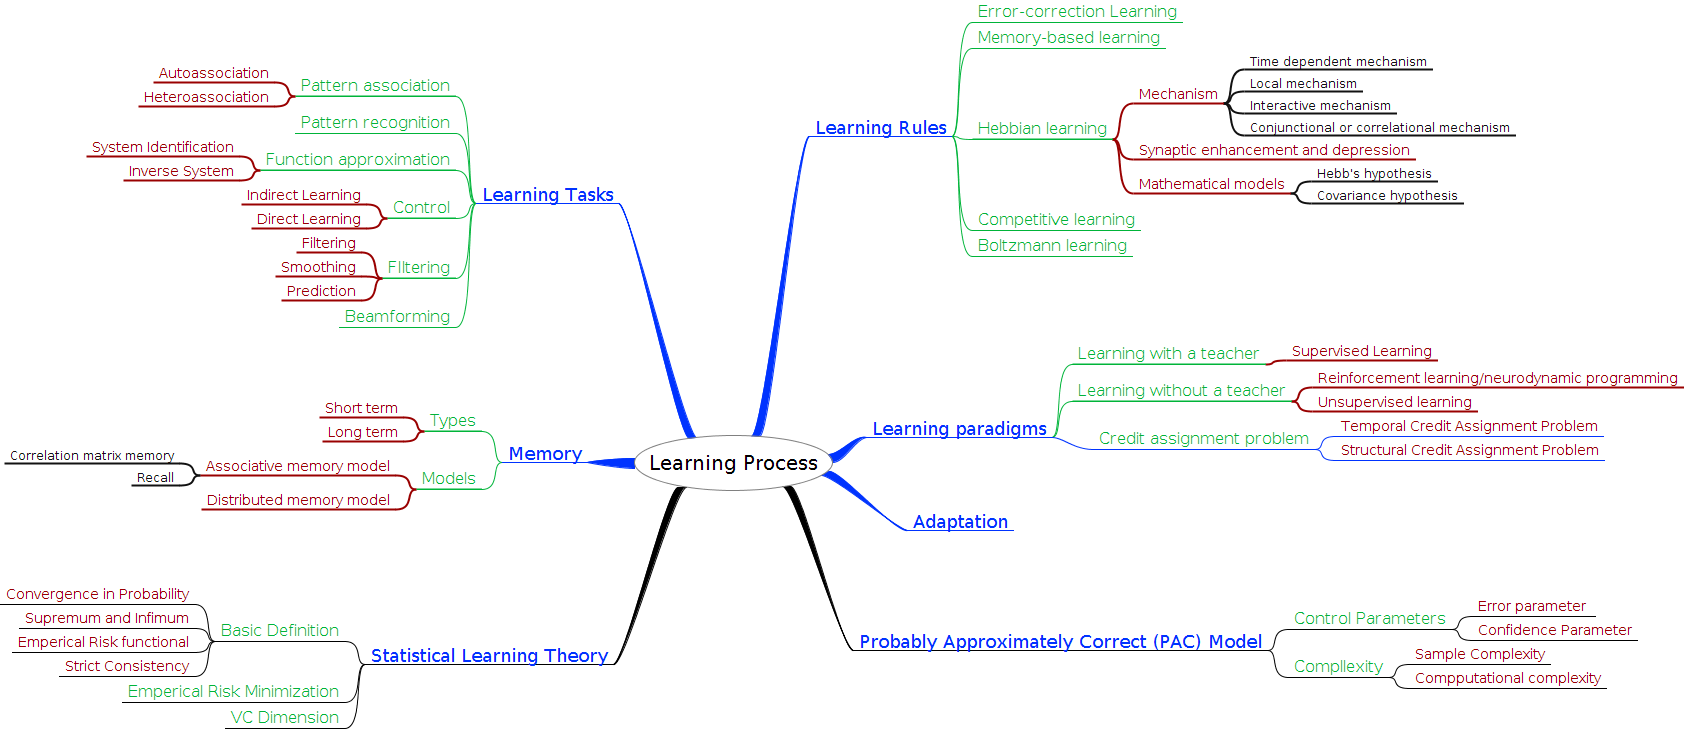

In [2]:
IPython.display.Image('images/HaykinChapter2_mindmap.png' ,embed= True)

---
## Question 2: 
Consider the space of instances X corresponding to all points in the x, y plane. Give the VC dimension of the following hypothesis spaces:

### 2 (a):
Hr = the set of all rectangles in the x,y plane. i.e. Hr ={((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } 

#### Answer:
The VC dimension of Hr is atleast **4** as can be seen in the below figure (assuming that the points inside the rectangle are **positive**). However, it is not possible to shatter 5 points and hence the VC dimension for Hr is **4**.

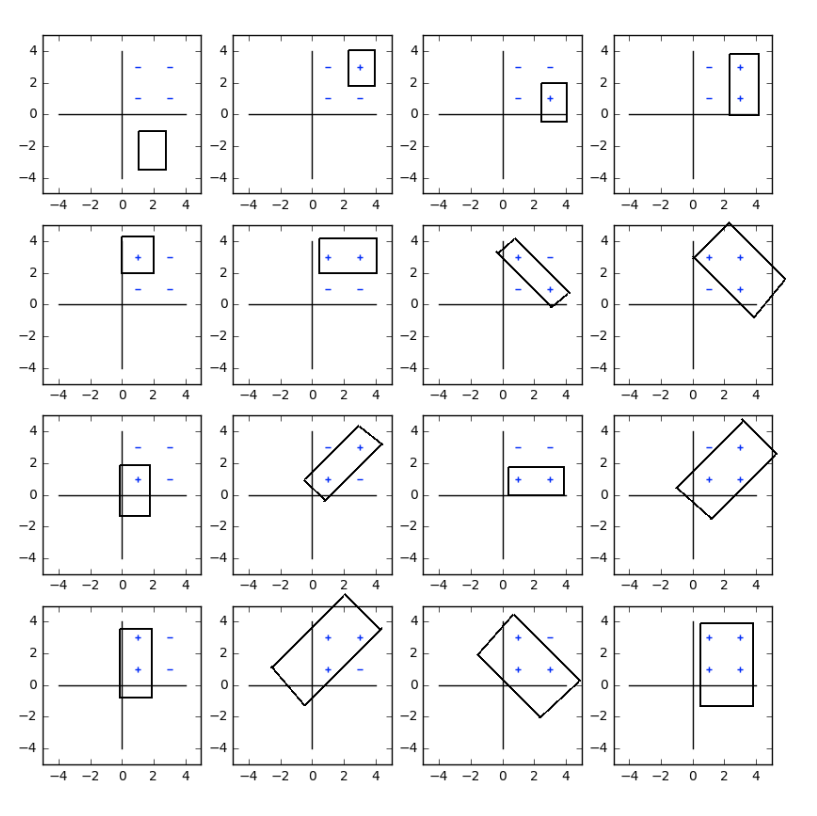

In [3]:
IPython.display.Image('images/rectangle.png' ,embed= True)

### 2 (b):
Hc = the set of all circles in the x,y plane. Points inside the circle are classified as positive examples

#### Answer:
   The VC dimension of Hc is atleast **3** as can be seen in the below figure. However, it is not possible to shatter 4 points and hence the VC dimension for Hc is **3**.

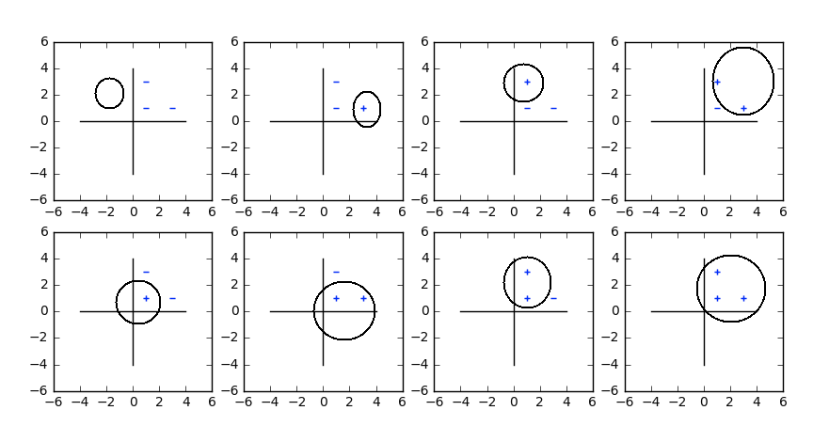

In [4]:
IPython.display.Image('images/circle.png' ,embed= True)

### 2 (c):
Ht = the set of all triangle in the x,y plane. Points inside the triangle are classified as positive examples.

#### Answer:
Similar to 2a and 3b, it is possible to shatter **7** points for Ht. Therefore, the VC dimension of Ht is **7**.

---
## Question 3: 
*Definition* Consistent Learner:

A learner is consistent if it outputs hypotheses that perfectly fit the training data, whenever possible. It is quite reasonable to ask that a learning algorithm be consistent, given that we typically prefer a hypothesis that fits the training data over one that does not.

*Task*:

Write a consistent learner for Hr from last Exercise (i.e., Hr = {((a < x < b)⋀(c < y < d)) | a, b,c, d ∈ IR } ). Generate a variety of target concept rectangles at random, corresponding to different rectangles in the plane. Generate random examples of each of these target concepts, based on a uniform distribution of instances within the rectangle from (0,0) to (100, 100).

Plot the generalization error as a function of the number of training examples, m. On the same graph, plot the theoretical relationship between e and m, for d = .95. Does theory fit experiment?

[Network built based on this github blog](http://iamtrask.github.io/2015/07/27/python-network-part2/)

In [5]:
class NeuralNetwork():
    """
    3 layer neural network with 1 input layer, 1 hidden layer, 
    1 output layer...
    """
    def __init__(self, num_hidden_neurons = 4, learning_rate = 0.01, 
                 epochs = 4000):
        # Layer 0 --> input, Layer 1 --> hidden, Layer 2 --> output
        np.random.seed(0)
        # weights randomly initialized...
        self.w_layer01 = np.random.rand(2, num_hidden_neurons)
        self.w_layer12 = np.random.rand(num_hidden_neurons, 1)
        self.num_hidden_neurons = num_hidden_neurons
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def non_linearity(self, value, derivative = False):
        if derivative == True: # return slope of sigmoid..
            return value*(1. - value)
        # included to avoid overflow in numpy exponent..
        value = np.array(value, dtype = np.float128)
        value = np.clip( value, -500, 500 )
        # return sigmoid activation value...
        return 1./(1. + np.exp(-value)) 
        
    def train(self, input_array, output_array):
        layer2_error = 0.
        for i in range(self.epochs+1):
            layer0 = input_array
            layer1_local_field = input_array.dot(self.w_layer01)
            layer1_output = self.non_linearity(layer1_local_field)
            
            layer2_local_field = layer1_output.dot(self.w_layer12)
            layer2_output = self.non_linearity(layer2_local_field)
        
            layer2_error = layer2_output - output_array
            layer2_delta = layer2_error * self.non_linearity(
                layer2_error, derivative = True)
        
            layer1_error = layer2_delta.dot(self.w_layer12.T)
            layer1_delta = layer1_error * self.non_linearity(
                layer1_error, derivative = True)
            
            # update weights based on error and slope of sigmoid...
            self.w_layer12 -= self.learning_rate * (
                layer1_output.T.dot(layer2_delta))
            self.w_layer01 -= self.learning_rate * (
                layer0.T.dot(layer1_delta))
            
            if i % 2000 == 0:
                print 'Epoch: ', i, '......', 'Training Error: ', (
                    np.mean(np.abs(layer2_error)))
        # training error at the end of epochs is returned...    
        return np.mean(np.abs(layer2_error))
                
    def predict(self, input_array, desired_array):
        layer0 = input_array
        layer1_local_field = input_array.dot(self.w_layer01)
        layer1_output = self.non_linearity(layer1_local_field)
        
        layer2_local_field = layer1_output.dot(self.w_layer12)
        layer2_output = self.non_linearity(layer2_local_field)
        
        layer2_error = layer2_output - desired_array
        
        # average generalization error is returned..
        return np.mean(np.abs(layer2_error))

In [6]:
# function to return random values from uniform distribution..
rand = lambda min_val, max_val, num_of_vals: (
        np.random.uniform(min_val, max_val, num_of_vals))

def generate_rectangle(min_x, max_x, min_y, max_y, rand):
    # function generates 4 random values for a rectangle..
    np.random.seed(0)
    a, c = rand(0, min_x, 1), rand(0, min_y, 1)
    b, d = rand(a, max_x, 1), rand(c, max_y, 1)
    return a, b, c, d
    
def generate_sample_set(min_val, max_val, num_samples, rand):
    # function generates random data points...
    np.random.seed(0)
    return np.array([ rand(min_val, max_val, 2)
                     for _ in range(num_samples) ])

def contains(a, b, c, d, sample_points):
    # function assigns labels to data points..
    sample_points = np.array(sample_points)
    # labels initialized as 0..
    sample_points = np.insert(sample_points, 2, 0, axis= 1)
    for index, point in enumerate(sample_points):
        if a < point[0] < b and c < point[1] < d:
            # labels changed to 1 if point is within rectangle..
            sample_points[index][2] = 1
    return sample_points

def theoretical_error(num_samples, d):
    # function calculates theoretical error based on m..
    VC_dim_H = 4
    e = sp.symbols('e')
    equation = (1/e)* ( (4 * sp.log(int(2/(1-d)), 2)) + (
        8 * VC_dim_H * sp.log(13/e, 2) ) ) - num_samples
    equation = sp.simplify(equation)
    return sp.solve(equation, e)

In [7]:
a, b, c, d = generate_rectangle(0, 100, 0, 100, rand)

In [8]:
num_samples = [150, 200, 300, 500, 1000, 1500, 2000]
training_error = []
generalization_error = []
for number in num_samples:
    # generate samples...
    samples = generate_sample_set(0, 100, number, rand)
    # assign labels to samples...
    samples_with_labels = contains(a, b, c, d, samples)
    # data points are shuffled randomly...
    np.random.shuffle(samples_with_labels)
    # data points are normalized to range 0 to 1..
    # this is because sigmoid saturates data points from -1 to 1..
    normalized_samples = samples_with_labels/100.
    # 80% samples are for training, 20% for testing..
    train_set, test_set = np.vsplit(normalized_samples, 
                                    [samples.shape[0]*8/10])
    # network is initialized
    network = NeuralNetwork()
    print '---------------------------------------------------------------'
    print "Number of Samples: ",number
    # network is trained... train(data_points, labels)
    t_error = network.train(train_set[:,:-1], train_set[:,-1:])
    training_error.append(t_error)
    # network is tested..predict(data_poitns, labels)
    g_error = network.predict(test_set[:,:-1], test_set[:,-1:])
    generalization_error.append(g_error)

    
num_samples_array = np.array(num_samples)[np.newaxis].T
generalization_error=np.array(generalization_error)[np.newaxis].T
training_error=np.array(training_error)[np.newaxis].T

print '---------------------------------------------------------------'
print 'Generalization error with 80% samples for training..'
print '[(number of samples, corresponding generalization error)]'
print np.hstack((num_samples_array, generalization_error))
print '---------------------------------------------------------------'
print 'Training error with 80% samples for training..'
print '[(number of samples, corresponding training error)]'
print np.hstack((num_samples_array, training_error))

---------------------------------------------------------------
Number of Samples:  150
Epoch:  0 ...... Training Error:  0.842262738518
Epoch:  2000 ...... Training Error:  0.0106950101445
Epoch:  4000 ...... Training Error:  0.00717265436726
---------------------------------------------------------------
Number of Samples:  200
Epoch:  0 ...... Training Error:  0.840618195696
Epoch:  2000 ...... Training Error:  0.00894331364101
Epoch:  4000 ...... Training Error:  0.00591144100431
---------------------------------------------------------------
Number of Samples:  300
Epoch:  0 ...... Training Error:  0.840466186482
Epoch:  2000 ...... Training Error:  0.00703821837695
Epoch:  4000 ...... Training Error:  0.0047750620633
---------------------------------------------------------------
Number of Samples:  500
Epoch:  0 ...... Training Error:  0.839919023848
Epoch:  2000 ...... Training Error:  0.00516873706208
Epoch:  4000 ...... Training Error:  0.00377122919684
----------------------

In [9]:
theory_error = np.array([ theoretical_error(num, 0.95) 
                         for num in num_samples ] )

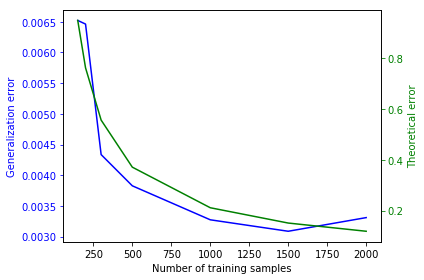

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(num_samples, generalization_error, color = 'b',
         label= 'Generalization error')
ax1.set_xlabel('Number of training samples')
ax1.set_ylabel('Generalization error',  color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(num_samples, theory_error, color = 'g',
         label= 'Theoretical error')
ax2.set_ylabel('Theoretical error', color = 'g')
ax2.tick_params('y', colors='g')
fig.tight_layout()
plt.show()


---
## Question 4:
Consider training a two-input perceptron. Give an upper bound on the number of training examples sufficient to assure with 90%  confidence that the learned perceptron will have true error of at most 5%. Does this bound seem realistic?

In [11]:
error = 0.05
delta_C = 0.9
m = (1/error)*(4*np.log2(2/(1-delta_C)) + 
              (8* 3 * np.log2(13/error)))
print 'Upper bound on number of training samples: ',np.ceil(m)

Upper bound on number of training samples:  4197.0


The bound on number of training samples does not seem realistic. In the previous question, we see that the error reduces to below 1% by taking 200 or more samples. Thus, a two-input perceptron should not require  4197 samples for getting a true error of at most 5%.

---
## Question 5:
Consider the class C  of concepts of the form (a <= x <= b) AND (c<=y <= d),  where a ,b , c , and d  are integers in the interval (0,99). Note each concept in this class correspondsto a rectangle with integer-valued boundaries on a portion of the x, y  plane. Hint: Given a region in the plane bounded by the points (0,0)  and (n -1 , n - 1),  the number of distinct rectangles with integer-valued boundaries within this region is 1/4 *  n(n+1)^2
     
### 5(a):
Give an upper bound on the number of randomly drawn training examples sufficient to assure that for any target concept c  in C,  any consistent learner using H = C  will, with probability 95%, output a hypothesis with error at most 0.15 !

In [12]:
error = 0.15
delta_C = 0.95
VC_d= 4
m = (1/error)*(4*np.log2(2/(1-delta_C)) + 
              (8*VC_d * np.log2(13/error)))
print "For one rectangle, upper bound on number of training samples: ",\
        int(np.ceil(m))

n=100

no_of_rectangles=1./4.*n*((n+1.)**2.)

print "Number of distinct rectangles with integer-valued boundaries within \
(0,0) and (99,99): ",int(no_of_rectangles)

print "Number or training samples for ",int(no_of_rectangles)," \
rectangles: ", int(no_of_rectangles*np.ceil(m))

For one rectangle, upper bound on number of training samples:  1516
Number of distinct rectangles with integer-valued boundaries within (0,0) and (99,99):  255025
Number or training samples for  255025  rectangles:  386617900


  
### 5(b):
Now suppose the rectangle boundaries a, b, c and d  take on real values instead of integer values. Update your answer to the first part of this question.

#### Answer:
When a,b,c and d take on real values instead of integer values, the total number of distinct rectangles  between the region (0,0) and (99,99) is infinite. As such, the number of training examples required for such a scenario, will also be infinite.

---